# Wrangle Volume Data

We wrangle the traffic volume data into a workable format, and extract just the site and detector we are interested in.

## Import data

In [1]:
import pandas as pd
f = pd.read_csv('../data/VSDATA_20150819.csv')

## Filter data

Filter to site 2433 (mid-way along segment of Princes freeway monitored by bluetooth detector sites). Detectors 4-6 are in the outbound/westbound lanes.

In [2]:
vols = f[(f["NB_SCATS_SITE"] == 2433) & f["NB_DETECTOR"].between(4,6)]
vols

,NB_SCATS_SITE,NM_REGION,QT_INTERVAL_COUNT,NB_DETECTOR,V00,V01,V02,V03,V04,V05,...,V89,V90,V91,V92,V93,V94,V95,CT_RECORDS,QT_VOLUME_24HOUR,CT_ALARM_24HOUR
26093,2433,GLI,2015-08-19 00:00:00,4,38,38,32,24,24,19,...,90,75,76,64,64,44,36,96,9126,0
26094,2433,GLI,2015-08-19 00:00:00,5,42,41,37,24,23,17,...,100,94,75,80,67,54,41,96,9866,0
26095,2433,GLI,2015-08-19 00:00:00,6,32,20,24,16,9,13,...,94,80,72,64,45,41,22,96,9675,0


## Date range

Extract date from CSV data

In [3]:
import datetime
start_date = vols["QT_INTERVAL_COUNT"].iloc[0]
start_datetime = datetime.datetime.strptime(start_date, '%Y-%m-%d 00:00:00')
date_range = pd.date_range(start_datetime, periods=96, freq='15T')
date_range[:10] # show first 10 rows

DatetimeIndex(['2015-08-19 00:00:00', '2015-08-19 00:15:00',
               '2015-08-19 00:30:00', '2015-08-19 00:45:00',
               '2015-08-19 01:00:00', '2015-08-19 01:15:00',
               '2015-08-19 01:30:00', '2015-08-19 01:45:00',
               '2015-08-19 02:00:00', '2015-08-19 02:15:00'],
              dtype='datetime64[ns]', freq='15T')

## Transform data

Transpose table. Label by time rather than interval. Use detector number as headers.

In [4]:
dets = vols.T
dets.columns = dets.loc["NB_DETECTOR"].values
dets = dets.loc['V00':'V95']
dets.index=date_range
dets.head()

,4,5,6
2015-08-19 00:00:00,38,42,32
2015-08-19 00:15:00,38,41,20
2015-08-19 00:30:00,32,37,24
2015-08-19 00:45:00,24,24,16
2015-08-19 01:00:00,24,23,9


## Export data

Extract just detector 6 (the rightmost lane)

In [5]:
d6 = dets[6]
d6.head()

2015-08-19 00:00:00    32
2015-08-19 00:15:00    20
2015-08-19 00:30:00    24
2015-08-19 00:45:00    16
2015-08-19 01:00:00     9
Freq: 15T, Name: 6, dtype: object

## Plots

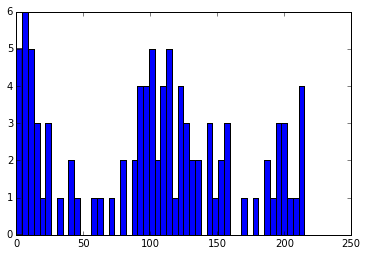

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
bins = np.linspace(0, max(d6), 51)
plt.hist(d6, bins=bins)
plt.show()

/home/asimmons/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


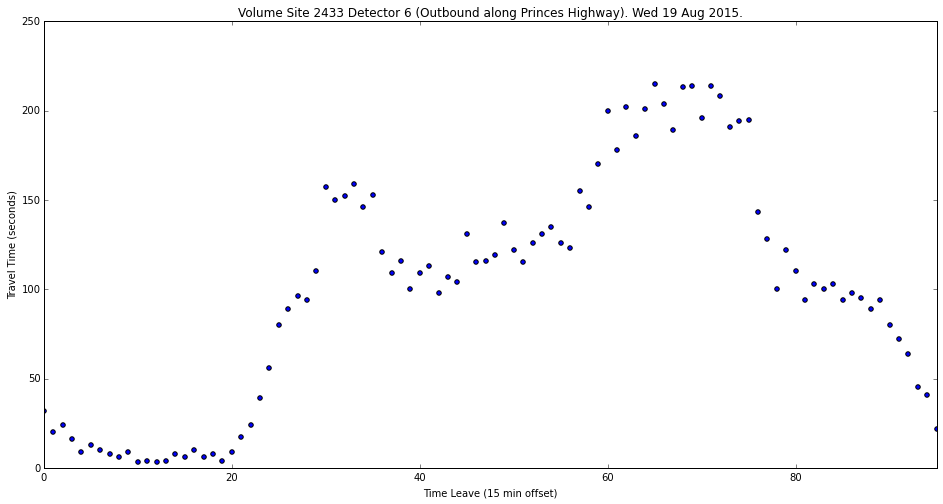

In [7]:
plt.figure(figsize=(16,8))
plt.scatter(np.arange(len(d6)), d6.values)
plt.title("Volume Site 2433 Detector 6 (Outbound along Princes Highway). Wed 19 Aug 2015.")
plt.ylabel("Travel Time (seconds)")
plt.xlabel("Time Leave (15 min offset)")
plt.xlim([0,95])
plt.ylim([0,None])
plt.show()